# Time Series Stationarity

**What is Stationarity?**

A time series is stationary if it does not exhibit any long term trends or obvious seasonality.

It has:

A constant variance through time

A constant mean through time

The statistical properties of the time series do not change

**Visualise Data**

In [2]:
# Import packages
import plotly.express as px
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import numpy as np

In [3]:
# Read in the data
data = pd.read_csv('/kaggle/input/monthly-beer-production/dataset/datasets_56102_107707_monthly-beer-production-in-austr.csv')
data.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [4]:
def plotting(title, data, x, y, x_label, y_label):
    """General function to plot the beer  data."""
    fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y: y_label})

    fig.update_layout(template="simple_white", font=dict(size=18),
                      title_text=title, width=1000,
                      title_x=0.5, height=400)

    fig.show()

In [5]:
# Plot the beer data
plotting(title='beer production', data=data, x='Month',
         y='Monthly beer production', x_label='Date', y_label='Beer')

Is this time series stationary? No.

There is a clear increasing trend from 1960 to 1975 and its kind of constant between 1975 to 1995 and the variance of fluctuations are also increasing in time.

To make the time series stationary, we need apply transformations to it.

# **Differencing**




The most common transformation is differencing.



Where d(t) is the difference at time t between the series at points y(t) and y(t-1).


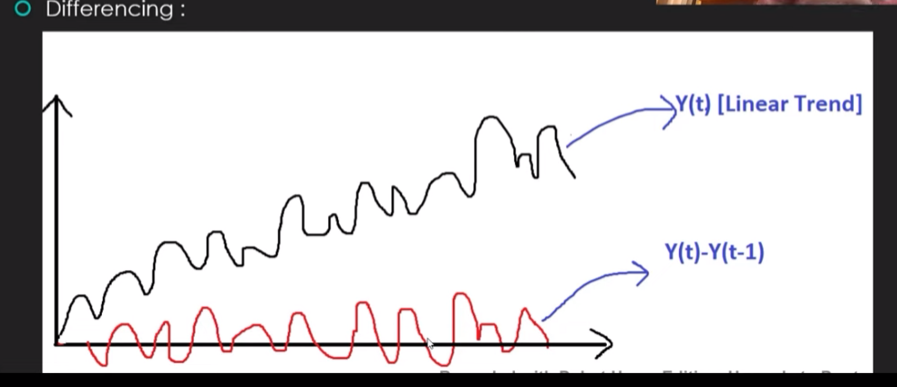


In [6]:
# Take the difference and plot it
data["BeerProduction_Diff"] = data['Monthly beer production'].diff()

plotting(title='Beer Production', data=data, x='Month', y='BeerProduction_Diff',
         x_label='Date', y_label='Beer Production<br>Difference Transform')

the differencing method kind of makes the mean 0 here but doesnot stabilize the variance 


# **Logarithm Transform**



To stabilise the variance, we apply the natural log transform.

In [7]:
# Take the log and plot it
data["Beer_Log"] = np.log(data["Monthly beer production"])

plotting(title='Beer Production', data=data, x='Month',
         y='Beer_Log', x_label='Date', y_label='Beer <br>Log Transform')

The fluctuations are now on a consistent scale, but there is still a trend. Therefore, we now again have to apply the difference transform.

# Logarithm and Difference Transform

In [8]:
# Take the difference and log and plot it
data["Beer_Diff_Log"] = data["Beer_Log"].diff()

plotting(title='Beer Production', data=data, x='Month',
         y= 'Beer_Diff_Log', x_label='Date', y_label='Beer<br>Log and Difference')

**Stationarity Test**


There are more quantitative techniques to determine if the data is indeed stationary.

One such method is the **Augmented Dickey-Fuller (ADF) test**. This is a statistical hypothesis test where the null hypothesis is the series is non-stationary (also known as a unit root test).

In [9]:
# ADF test
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print('ADF Statistic: ', test_results[0])
    print('P-Value: ', test_results[1])
    print('Critical Values:')
    for thres, adf_stat in test_results[4].items():
        print('\t%s: %.2f' % (thres, adf_stat))


adf_test(data["Beer_Diff_Log"][1:])

ADF Statistic:  -4.86964567443618
P-Value:  3.9942743177304e-05
Critical Values:
	1%: -3.44
	5%: -2.87
	10%: -2.57


**as our ADF Statistic is -4.86 < -3.44 , Beer Production is stationary with about 99% certainity**
and our timeseries is stationary

**Confirming using kpss test**

In [10]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    
kpss_test(data["Beer_Diff_Log"][1:])


Results of KPSS Test:
Test Statistic           0.009148
p-value                  0.100000
#Lags Used               4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/tmp/ipykernel_33/2538805158.py:5: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.




**pvalue- 0.1> 0.05 and the test statistic< critical value ..therefore trend is stationary** 

**AS Both tests conclude that the given series is stationary – The series is stationary**